# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [13]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train)

60000 train samples
10000 test samples
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


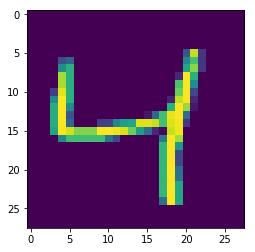

In [14]:
plt.imshow(x_train[2].reshape(28,28))

In [15]:
initial_mlnn_loss = []


In [16]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
initial_mlnn_loss.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43u

In [10]:
initial_mlnn_loss

[[0.10650663499242005, 0.983299970626831]]

## Adding noise to the data.

In [9]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = random_noise(x_train)
x_test = x_test.reshape(10000, 784)
x_test = random_noise(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#x_train[0] 60000 x_train[1] 784

60000 train samples
10000 test samples


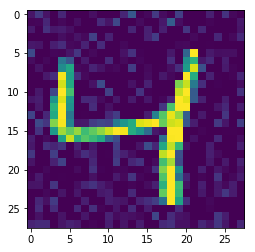

In [10]:
plt.imshow(x_train[2].reshape(28,28))

In [11]:
noisey_mlnn_loss = []

In [12]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
noisey_mlnn_loss.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41u

## Adding more noise

In [31]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = random_noise(x_train, mode='speckle')
x_test = x_test.reshape(10000, 784)
x_test = random_noise(x_test, mode='speckle')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#x_train[0] 60000 x_train[1] 784

60000 train samples
10000 test samples


In [32]:
more_noise_loss = []

In [33]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
more_noise_loss.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45u

In [34]:
print(noisey_mlnn_loss)
print(initial_mlnn_loss)
print(more_noise_loss)

[[0.08534564933415968, 0.9761000275611877]]
[[0.1189450991806239, 0.9825999736785889]]
[[0.08227490533783566, 0.9769999980926514]]


## Graphing loss scores for MLNN

Text(0,0.5,'Accuracy Score for MLNN')

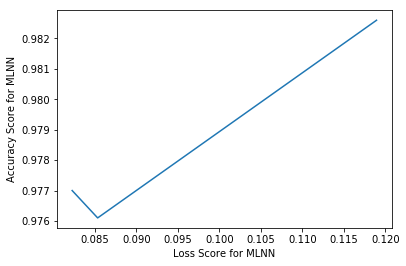

In [63]:
# flatten the lists containing loss scores.
x1 = np.array(noisey_mlnn_loss).flatten()[0]
y1 = np.array(noisey_mlnn_loss).flatten()[1]

x2 = np.array(initial_mlnn_loss).flatten()[0]
y2 = np.array(initial_mlnn_loss).flatten()[1]

x3 = np.array(more_noise_loss).flatten()[0]
y3 = np.array(more_noise_loss).flatten()[1]

x = [x2,x1,x3]
y = [y2,y1,y3]
# graph the data.
plt.plot(x,y)
plt.xlabel("Loss Score for MLNN")
plt.ylabel("Accuracy Score for MLNN")

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [18]:
convnet_loss = []

In [19]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
convnet_loss.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2690 - accuracy: 0.9176 - val_loss: 0.0595 - val_accuracy: 0.9802
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0872 - accuracy: 0.9737 - val_loss: 0.0429 - val_accuracy: 0.9854
Epoch 3/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 4/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0549 - accuracy: 0.9835 - val_loss: 0.0304 - val_accuracy: 0.9888
Epoch 5/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 6/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 7/12
60000/60000 [==============================] - 61s 1ms/st

## Adding noise to convnet

In [21]:
noise_convnet = []

In [23]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = random_noise(x_train)
x_test = random_noise(x_test)

In [24]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
noise_convnet.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 58s 974us/step - loss: 0.2693 - accuracy: 0.9195 - val_loss: 0.0592 - val_accuracy: 0.9820
Epoch 2/12
60000/60000 [==============================] - 59s 984us/step - loss: 0.0901 - accuracy: 0.9731 - val_loss: 0.0402 - val_accuracy: 0.9861
Epoch 3/12
60000/60000 [==============================] - 59s 985us/step - loss: 0.0692 - accuracy: 0.9794 - val_loss: 0.0371 - val_accuracy: 0.9881
Epoch 4/12
60000/60000 [==============================] - 59s 986us/step - loss: 0.0566 - accuracy: 0.9835 - val_loss: 0.0308 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 59s 983us/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0327 - val_accuracy: 0.9884
Epoch 6/12
60000/60000 [==============================] - 59s 983us/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0316 - val_accuracy: 0.9906
Epoch 7/12
60000/60000 [==============================] 

## Changing the amount of noise added to the training and testing set.

In [27]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = random_noise(x_train, mode='speckle')
x_test = random_noise(x_test, mode='speckle')

In [28]:
noise_loss_2 = []

In [29]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
noise_loss_2.append(model.evaluate(x_test, y_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 59s 983us/step - loss: 0.2590 - accuracy: 0.9206 - val_loss: 0.0593 - val_accuracy: 0.9799
Epoch 2/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0890 - accuracy: 0.9739 - val_loss: 0.0442 - val_accuracy: 0.9859
Epoch 3/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0676 - accuracy: 0.9796 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0556 - accuracy: 0.9837 - val_loss: 0.0302 - val_accuracy: 0.9899
Epoch 5/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0324 - val_accuracy: 0.9890
Epoch 6/12
60000/60000 [==============================] - 60s 994us/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0283 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] - 60s 99

In [30]:
print(convnet_loss)
print(noise_convnet)
print(noise_loss_2)

[[0.027638795424243655, 0.9915000200271606]]
[[0.03143596427084858, 0.9904999732971191]]
[[0.025003947326906927, 0.9926000237464905]]


## Graphing the scores

Text(0,0.5,'Accuracy Score for Convnet')

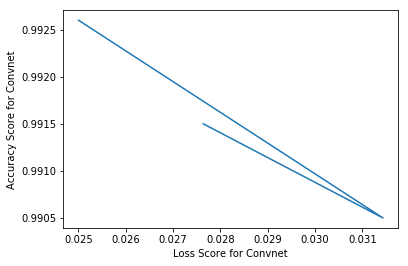

In [64]:
# had to flatten the 2D array to extract the scores w.o. loop
x1 = np.array(convnet_loss).flatten()[0]
y1 = np.array(convnet_loss).flatten()[1]

x2 = np.array(noise_convnet).flatten()[0]
y2 = np.array(noise_convnet).flatten()[1]

x3 = np.array(noise_loss_2).flatten()[0]
y3 = np.array(noise_loss_2).flatten()[1]

x = [x1,x2,x3]
y = [y1,y2,y3]

plt.plot(x, y)
plt.xlabel("Loss Score for Convnet")
plt.ylabel("Accuracy Score for Convnet")

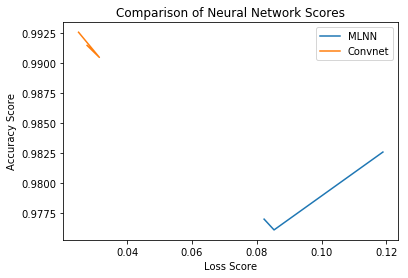

In [70]:
# flatten the lists containing loss scores.
x1 = np.array(noisey_mlnn_loss).flatten()[0]
y1 = np.array(noisey_mlnn_loss).flatten()[1]

x2 = np.array(initial_mlnn_loss).flatten()[0]
y2 = np.array(initial_mlnn_loss).flatten()[1]

x3 = np.array(more_noise_loss).flatten()[0]
y3 = np.array(more_noise_loss).flatten()[1]

x = [x2,x1,x3]
y = [y2,y1,y3]


# had to flatten the 2D array to extract the scores w.o. loop
x4 = np.array(convnet_loss).flatten()[0]
y4 = np.array(convnet_loss).flatten()[1]

x5 = np.array(noise_convnet).flatten()[0]
y5 = np.array(noise_convnet).flatten()[1]

x6 = np.array(noise_loss_2).flatten()[0]
y6 = np.array(noise_loss_2).flatten()[1]

x2 = [x4,x5,x6]
y2 = [y4,y5,y6]

# graph the data.
plt.plot(x,y, label = 'MLNN')
plt.plot(x2,y2, label = 'Convnet')
plt.title("Comparison of Neural Network Scores")
plt.xlabel("Loss Score")
plt.ylabel("Accuracy Score")
plt.legend()